In [82]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

types = "real"
num_classes = 34
jsd = True
directory = '../../jideca/saved/'
#log_name = 'log_b01re'
log_names = ['log_b01re', 'log_b02re', 'log_b05re', 'log_b1re', 'log_b10re']

In [78]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Text(0, 0.5, 'loss')

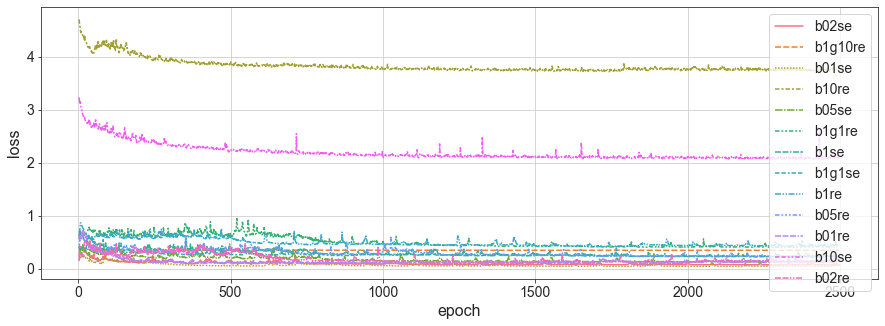

In [104]:
k = 0
for dirs in glob.glob(directory + '*'):
    column_name = dirs.split('/')[-1].split('_')[-1]
    log_path = dirs + '/check_point/' + dirs[-2:] + '_' + str(num_classes) + '/'
    fig_path = dirs + '/plot/'
    if not os.path.isdir(fig_path):
        os.mkdir(fig_path)
    if jsd:
        epoch_fmt = '_jsd_idec_epoch'
    else:
        epoch_fmt = '_idec_epoch'
    num = list()
    for f in glob.glob(log_path + "*"):
        num.append(int(f.split('epoch')[-1]))

    num.sort()
    loss = list()
    for i in num:
        f = open(log_path + epoch_fmt + str(i)).read()
        loss.append(float(f.split('loss:')[-1].split(', *')[0]))

    f = f.split('*')[-1].split(':')[-1]
    best_loss = float(f.split('[')[0])
    best_epoch = int(f.split('[')[-1].split('/')[0])
    if k == 0:
        df = pd.DataFrame({column_name: loss}, index=num)
    else:
        df[column_name] = pd.Series(loss)
    k += 1


Text(0, 0.5, 'loss')

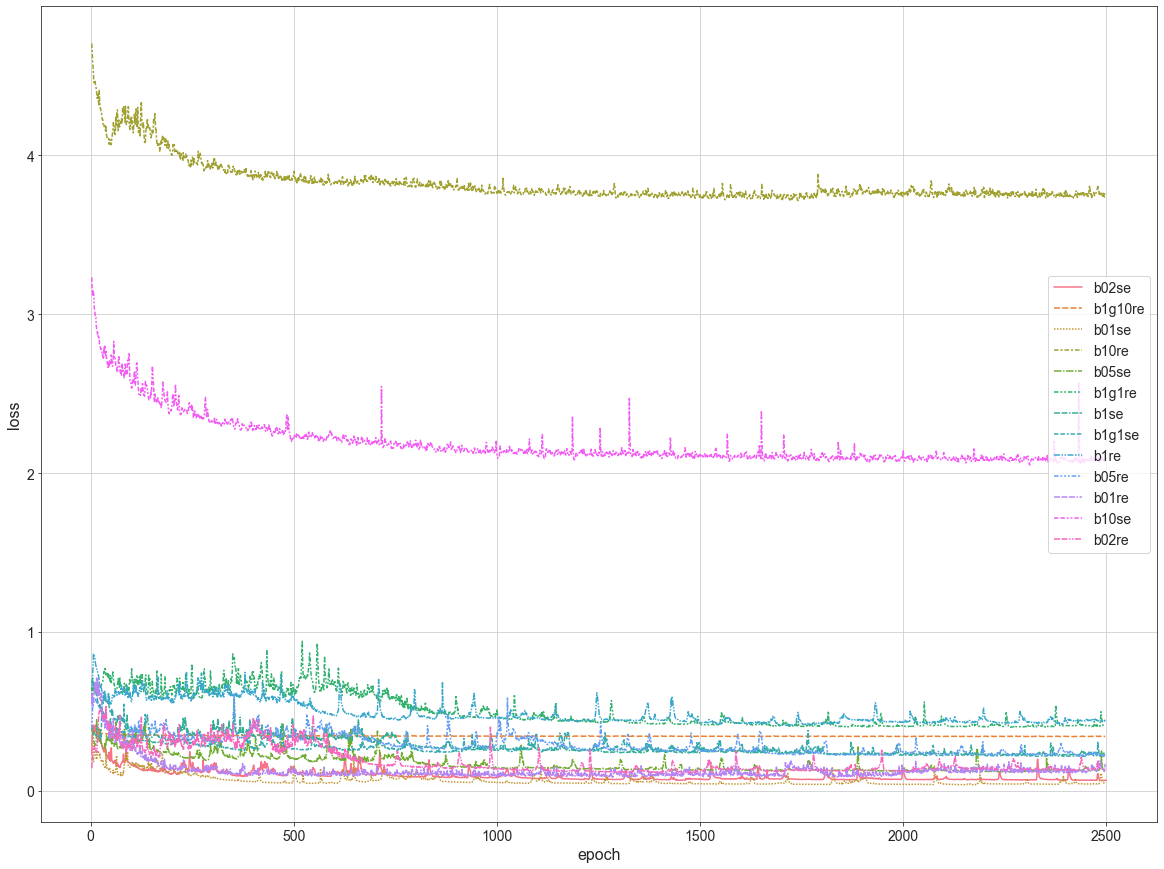

In [105]:
plt.figure(figsize=(20, 15))
sns.set_style("ticks", {'axes.grid' : True})
sns.lineplot(data=df)
#plt.plot(best_epoch, best_loss, 'rs')
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)

In [100]:
k = 0
for log_name in log_names:
    log_path = directory + log_name + "/check_point/"
    log_path = log_path + log_name[-2:] + "_" + str(num_classes) + "/"
    fig_path = directory + log_name + "/plot/"
    if not os.path.isdir(fig_path):
        os.mkdir(fig_path)
    if jsd:
        epoch_fmt = '_jsd_idec_epoch'
    else:
        epoch_fmt = '_idec_epoch'
    column_name = log_name.split('_')[-1]
    num = list()
    for f in glob.glob(log_path + "*"):
        num.append(int(f.split('epoch')[-1]))

    num.sort()
    loss = list()
    for i in num:
        f = open(log_path + epoch_fmt + str(i)).read()
        loss.append(float(f.split('loss:')[-1].split(', *')[0]))

    f = f.split('*')[-1].split(':')[-1]
    best_loss = float(f.split('[')[0])
    best_epoch = int(f.split('[')[-1].split('/')[0])
    if k == 0:
        df = pd.DataFrame({column_name: loss}, index=num)
    else:
        df[column_name] = pd.Series(loss)
    k += 1


Text(0, 0.5, 'loss')

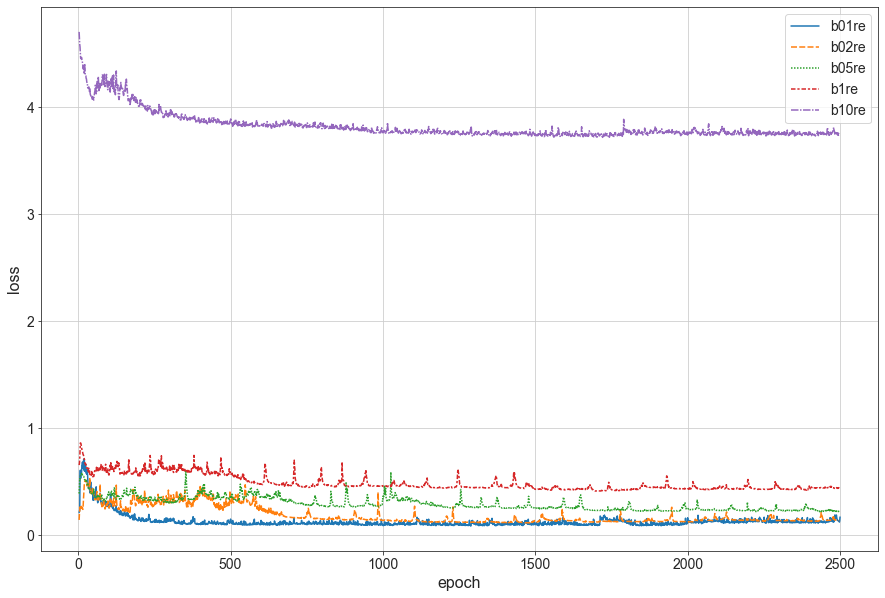

In [102]:
plt.figure(figsize=(15, 10))
sns.set_style("ticks", {'axes.grid' : True})
sns.lineplot(data=df)
#plt.plot(best_epoch, best_loss, 'rs')
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)

In [8]:
log_path = directory + log_name + "/check_point/"
log_path = (log_path + ("re" if types == "real" else "se") + "_" + str(num_classes) + "/")

fig_path = directory + log_name + "/plot/"

if not os.path.isdir(fig_path):
    os.mkdir(fig_path)

if jsd:
    epoch_fmt = '_jsd_idec_epoch'
else:
    epoch_fmt = '_idec_epoch'

title = "epoch_to_loss_" + ("re" if types == "real" else "se") + "_" + str(num_classes)
save_path = fig_path + "/" + title


In [46]:
num = list()
for f in glob.glob(log_path + "*"):
    num.append(int(f.split('epoch')[-1]))

num.sort()
loss = list()
for i in num:
    f = open(log_path + epoch_fmt + str(i)).read()
    loss.append(float(f.split('loss:')[-1].split(', *')[0]))

f = f.split('*')[-1].split(':')[-1]
best_loss = float(f.split('[')[0])
best_epoch = int(f.split('[')[-1].split('/')[0])

print(best_epoch, best_loss)


1288 0.086


In [47]:
#df = pd.DataFrame([ x for x in zip(num, loss)])
#df.columns = ['num', 'loss']
df = pd.DataFrame({'num':num, 'loss':loss})
df.head(5)

,num,loss
0,3,0.2123
1,4,0.2232
2,5,0.2381
3,6,0.5490
4,7,0.6085


Text(0.5, 1.0, 'epoch_to_loss_re_34')

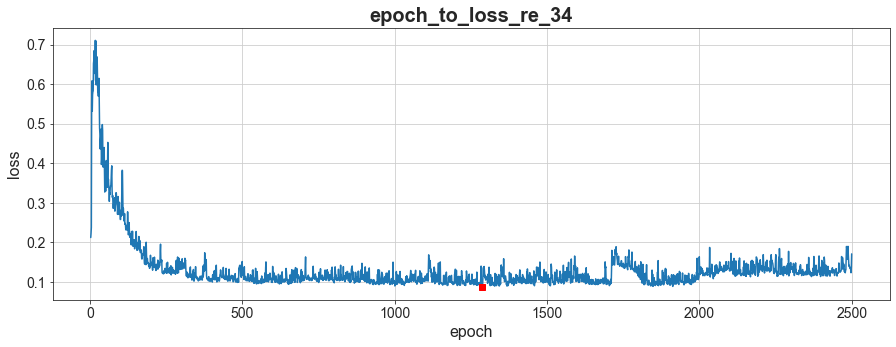

In [48]:
plt.figure(figsize=(15, 5))
sns.set_style("ticks", {'axes.grid' : True})
#sns.relplot(x='num', y='loss', data=df, kind='line')
sns.lineplot(x='num', y='loss', data=df)
#plt.plot(num, loss, LineWidth=1)
plt.plot(best_epoch, best_loss, 'rs')
#plt.annotate('best loss', xy=(best_epoch, best_loss), xytext=(best_epoch, best_loss))
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.title(title, fontsize=20, fontweight=560)
#plt.savefig(save_path + '.png')
#plt.show()